In [21]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
original_size_img = (1664, 1128)
half_size_img = (1177, 798)
five_percent_size_img = (372, 252)
two_half_size_img = (263, 178)

## Plotting Precision and Accuracy Function

In [3]:
def plot_loss_and_accuracy(results, final=False):
    
    if final:
        val_label="test"
    else:
        val_label="validation"

    # Extracting metrics from model fitting
    train_loss = results.history['loss']
    val_loss = results.history['val_loss']
    train_precision = results.history['recall']
    val_precision = results.history['val_recall']
    train_accuracy = results.history['binary_accuracy']
    val_accuracy = results.history['val_binary_accuracy']

    # Setting up plots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

    # Plotting loss info
    ax1.set_title("Loss")
    sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label="train")
    sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label=val_label)
    ax1.legend()

    #Plotting m
    ax2.set_title("Recall")
    sns.lineplot(x=results.epoch, y=train_precision, ax=ax2, label="train")
    sns.lineplot(x=results.epoch, y=val_precision, ax=ax2, label=val_label)
    ax2.legend()
    
    # Plotting accuracy info
    ax3.set_title("Accuracy")
    sns.lineplot(x=results.epoch, y=train_accuracy, ax=ax3, label="train")
    sns.lineplot(x=results.epoch, y=val_accuracy, ax=ax3, label=val_label)
    ax3.legend()

## Image Data Generator

In [4]:
# Directory path
train_data_dir = '../data/localdata/chest_xray/train'
test_data_dir = '../data/localdata/chest_xray/test'

# Get all the data in the directory data/localdata/chest_xray/test (624 images), and reshape them
training_generator = ImageDataGenerator(rescale=1/255, validation_split=0.25)
    #                                     ,
    # rotation_range=30,
    # width_shift_range=0.3,
    # height_shift_range=0.3,
    # horizontal_flip=True)
test_generator = ImageDataGenerator(rescale=1/255)

train_set = training_generator.flow_from_directory(
        train_data_dir, target_size=(300, 300), batch_size=32, color_mode='grayscale', 
        class_mode='binary', seed=42, subset='training')

val_set = training_generator.flow_from_directory(
    train_data_dir, target_size=(300, 300), batch_size=32, color_mode='grayscale', 
         class_mode='binary', seed=42, subset='validation')

test_set = test_generator.flow_from_directory(
        test_data_dir, target_size=(300, 300), batch_size=32, color_mode='grayscale', class_mode='binary')

# Create the datasets
train_images, train_labels = next(train_set)
test_images, test_labels = next(test_set)

Found 3925 images belonging to 2 classes.
Found 1307 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [48]:
pd.Series(test_labels).value_counts(normalize=True)

1.0    0.71875
0.0    0.28125
Name: proportion, dtype: float64

## First Complicated Model

In [5]:
# model = models.Sequential()
# model.add(layers.Conv2D(filters=32,
#                        kernel_size=(3, 3),
#                        activation='relu',
#                        input_shape=(200, 200, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu', ))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu', ))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))
# model.compile(optimizer='Adam',
#               loss='BinaryCrossentropy',
#               metrics=['Recall', 'BinaryAccuracy'])

# early_stop = EarlyStopping(monitor='val_binary_accuracy', min_delta=0.001,
#                            verbose=1, patience=4, restore_best_weights=True,
#                            mode='auto')

# results = model.fit(train_set, epochs=50, validation_data=val_set, callbacks=early_stop)

In [6]:
# plot_loss_and_accuracy(results)

In [7]:
# model.evaluate(test_set)

## Hybrid with Lydia Best Model

In [8]:
# best_model = models.Sequential()
# best_model.add(layers.Conv2D(filters=32,
#                         kernel_size=(3, 3),
#                         activation='relu',
#                         input_shape=(250, 250, 1)))
# best_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# best_model.add(layers.Flatten())
# best_model.add(layers.Dense(64, activation='relu'))
# best_model.add(layers.Dense(1, activation='sigmoid'))

# best_model.compile(optimizer='Adam',
#               loss='BinaryCrossentropy',
#               metrics=['Recall', 'BinaryAccuracy'])

# checkpoint_path = "best_model/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)

# early_stop = EarlyStopping(monitor='val_binary_accuracy', min_delta=0.001,
#                            verbose=1, patience=4, restore_best_weights=True,
#                            mode='auto')

# results_best = best_model.fit(train_set, epochs=50, validation_data=val_set,
#                     callbacks=[ early_stop])

In [9]:
# plot_loss_and_accuracy(results_best)

In [10]:
# best_model.evaluate(test_set)

## Step up Complexity Model

In [11]:
# model3 = models.Sequential()
# model3.add(layers.Conv2D(filters=32,
#                         kernel_size=(3, 3),
#                         activation='relu',
#                         input_shape=(64, 64, 1)))
# model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model3.add(layers.Flatten())
# model3.add(layers.Dense(64, activation='relu'))
# model3.add(layers.Dense(1, activation='sigmoid'))

# model3.compile(optimizer='Adam',
#               loss='BinaryCrossentropy',
#                 metrics=['Recall', 'BinaryAccuracy'])

# early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8,
#                            verbose=1, patience=3,
#                            mode='min')

# results3 = model3.fit(train_generator, epochs=10, validation_data=validation_set,
#                     callbacks=[early_stop])

In [12]:
# plot_loss_recall_and_accuracy(results3)

## Best Model

Metal device set to: Apple M1


2023-09-14 22:47:10.478649: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-14 22:47:10.478945: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/50


2023-09-14 22:47:10.801508: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-09-14 22:47:11.067236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


123/123 [==============================] - ETA: 0s - loss: 0.2974 - recall: 0.9379 - binary_accuracy: 0.8736

2023-09-14 22:47:42.738256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


123/123 [==============================] - 37s 290ms/step - loss: 0.2974 - recall: 0.9379 - binary_accuracy: 0.8736 - val_loss: 0.0904 - val_recall: 0.9701 - val_binary_accuracy: 0.9717
Epoch 2/50
123/123 [==============================] - 35s 283ms/step - loss: 0.1106 - recall: 0.9732 - binary_accuracy: 0.9582 - val_loss: 0.0856 - val_recall: 0.9907 - val_binary_accuracy: 0.9648
Epoch 3/50
123/123 [==============================] - 34s 276ms/step - loss: 0.0874 - recall: 0.9804 - binary_accuracy: 0.9679 - val_loss: 0.1019 - val_recall: 0.9619 - val_binary_accuracy: 0.9671
Epoch 4/50
123/123 [==============================] - 34s 280ms/step - loss: 0.0634 - recall: 0.9839 - binary_accuracy: 0.9753 - val_loss: 0.1053 - val_recall: 0.9887 - val_binary_accuracy: 0.9656
Epoch 5/50
123/123 [==============================] - 35s 283ms/step - loss: 0.0525 - recall: 0.9883 - binary_accuracy: 0.9819 - val_loss: 0.0817 - val_recall: 0.9887 - val_binary_accuracy: 0.9770
Epoch 6/50
123/123 [======

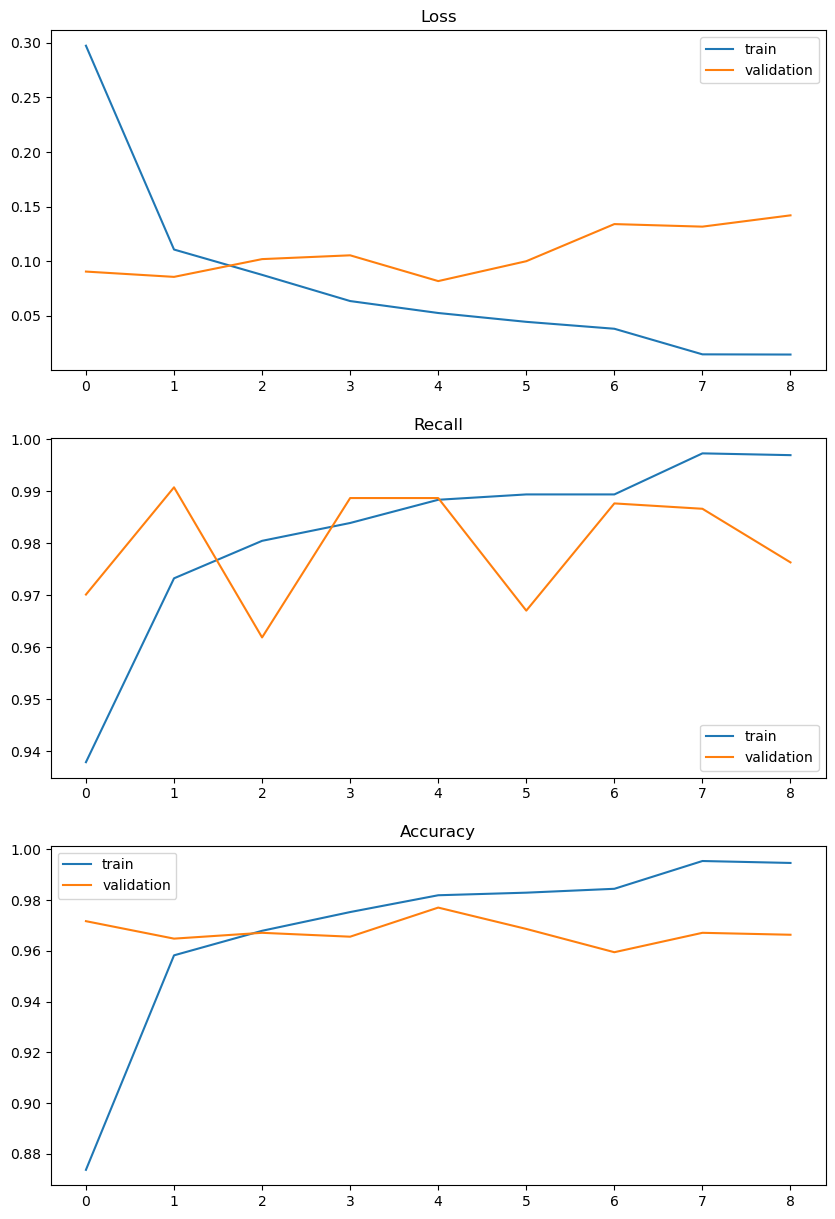

In [13]:
model4 = models.Sequential()
model4.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(300, 300, 1)))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))
model4.add(layers.Conv2D(32, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.Flatten())
# model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='Adam',
              loss='BinaryCrossentropy',
              metrics=['Recall', 'BinaryAccuracy'])
early_stop = EarlyStopping(monitor='val_binary_accuracy', min_delta=0.001,
                           verbose=1, patience=4, restore_best_weights=True,
                           mode='auto')

results4 = model4.fit(train_set, epochs=50, validation_data=val_set, callbacks=early_stop)
plot_loss_and_accuracy(results4)


In [14]:
model4.evaluate(test_set)

20/20 [==============================] - 3s 137ms/step - loss: 0.8908 - recall: 0.9949 - binary_accuracy: 0.8157


[0.8907758593559265, 0.9948718547821045, 0.8157051205635071]

In [30]:
predictions = model4.predict(test_images)  # probabilities
rounded_predictions = np.round(predictions)

1/1 [==============================] - 0s 113ms/step


In [34]:
cm = confusion_matrix(test_labels, rounded_predictions)
print(cm)

[[ 5  4]
 [ 0 23]]


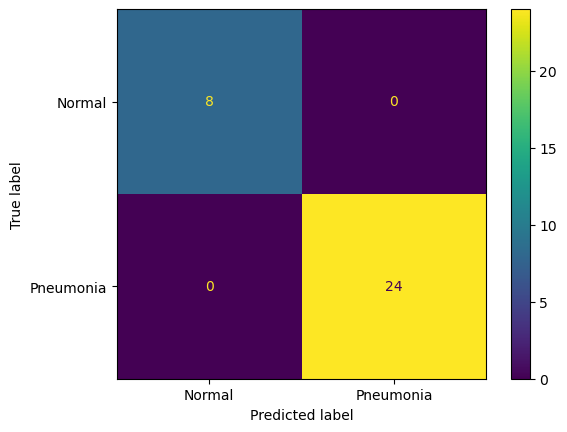

In [46]:
predictions = model4.predict(test_images)  # probabilities
rounded_predictions = np.round(predictions)
cm = confusion_matrix(test_labels, rounded_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Normal', 'Pneumonia'], )
disp.plot()

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [31]:
cm =np.array([[ 5],  [4], [ 0], [23]])

In [32]:
cm

array([[ 5],
       [ 4],
       [ 0],
       [23]])

In [58]:
(cm.flatten()).T

array([ 5,  4,  0, 23])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


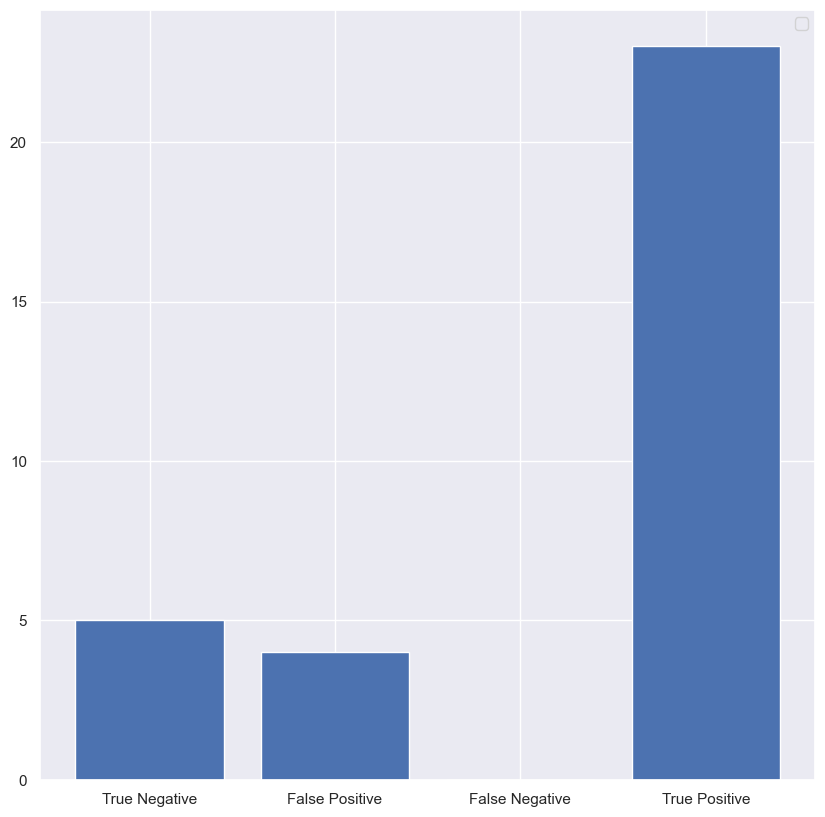

In [21]:
sns.set_theme()
fibg, ax = plt.subplots(figsize=(10,10))
ax.bar(['True Negative', 'False Positive', 'False Negative', 'True Positive'], cm.flatten())
ax.legend(['True Negative', 'False Positive', 'False Negative', 'True Positive']);

In [42]:
cm_data

,True Negative,False Positive,False Negative,True Positive
0,5,4,0,23


In [44]:
cm_data.columns

Index(['True Negative', 'False Positive', 'False Negative', 'True Positive'], dtype='object')

,True Negative,False Positive,False Negative,True Positive
0,5,4,0,23


In [51]:
cm

array([[ 5],
       [ 4],
       [ 0],
       [23]])

In [56]:
cm

array([[ 5],
       [ 4],
       [ 0],
       [23]])

In [61]:
cm_data

,0
True Negative,5
False Positive,4
False Negative,0
True Positive,23


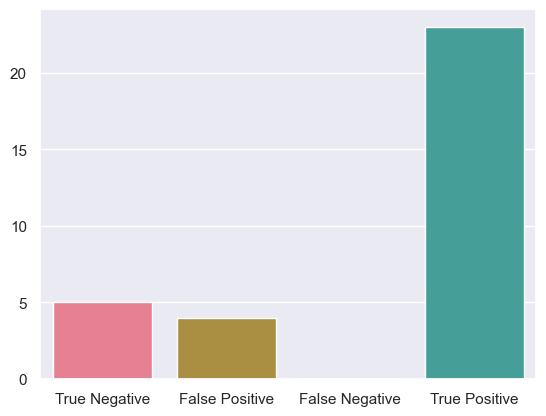

In [64]:
cm_data = pd.DataFrame(data=(cm.flatten()).T, index=['True Negative', 'False Positive', 'False Negative', 'True Positive'])
ax = sns.barplot( data=cm_data.T)

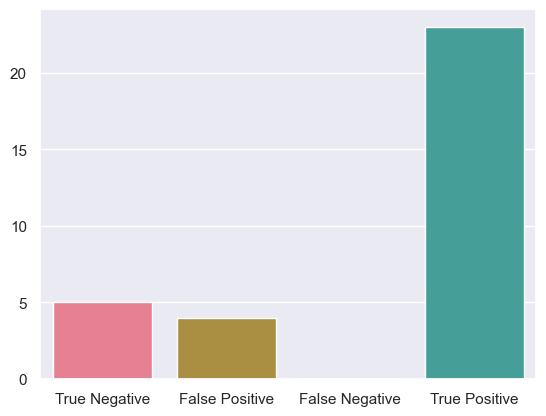

In [67]:
cm_data = pd.DataFrame(data=(cm.flatten()).T, index=['True Negative', 'False Positive', 'False Negative', 'True Positive'])
ax = sns.barplot( data=cm_data.T)

# Customizing the plot
sns.set_palette("husl", as_cmap=True)  # Changing the color palette

# Display the plot
plt.show()